In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from path import Path
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_HR=pd.read_csv("Resources/aug_train.csv")
df_HR.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
#number of rows and columns
df_HR.shape

(19158, 14)

In [4]:
# Duplicate rows
df_HR.duplicated().sum()

0

In [5]:
#Data types
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
df_HR.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [7]:
df_HR.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [8]:
# Null or NAN rows
df_HR.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

# company_size

In [3]:
c_2 = df_HR["company_size"].value_counts(normalize=True)
c_2

50-99        0.233207
100-500      0.194478
10000+       0.152723
10/49        0.111271
1000-4999    0.100454
<10          0.098941
500-999      0.066339
5000-9999    0.042587
Name: company_size, dtype: float64

In [4]:
#Iteration
dash = ["-", "/"]
for i in dash:
    df_HR["company_size"]= df_HR["company_size"].str.replace(i,"to")
df_HR.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50to99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50to99,Funded Startup,4,8,0.0


In [5]:
c_2 = df_HR["company_size"].value_counts()
c_2

50to99        3083
100to500      2571
10000+        2019
10to49        1471
1000to4999    1328
<10           1308
500to999       877
5000to9999     563
Name: company_size, dtype: int64

In [6]:
#Iteration
dash = ["+"]
for i in dash:
    df_HR["company_size"]= df_HR["company_size"].str.replace(i,"_plus")
df_HR.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50to99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50to99,Funded Startup,4,8,0.0


In [7]:
c_2 = df_HR["company_size"].value_counts()
c_2

50to99        3083
100to500      2571
10000_plus    2019
10to49        1471
1000to4999    1328
<10           1308
500to999       877
5000to9999     563
Name: company_size, dtype: int64

In [8]:
dash = ["<"]
for i in dash:
    df_HR["company_size"]= df_HR["company_size"].str.replace(i,"less_")
df_HR.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50to99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50to99,Funded Startup,4,8,0.0


In [9]:
c_2 = df_HR["company_size"].value_counts()
c_2

50to99        3083
100to500      2571
10000_plus    2019
10to49        1471
1000to4999    1328
less_10       1308
500to999       877
5000to9999     563
Name: company_size, dtype: int64

In [12]:
df_HR.sample()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
8869,70,city_16,0.91,Male,Has relevent experience,no_enrollment,Masters,STEM,9,NaN,Pvt Ltd,1,36,0.0


In [13]:
df_HR["company_size"]= df_HR["company_size"].fillna("50through99")
df_HR

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50through99,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50to99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,50through99,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,50through99,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50to99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,50through99,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50through99,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50to99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500to999,Pvt Ltd,2,97,0.0


In [14]:
c_2 = df_HR["company_size"].value_counts()
c_2

50through99    5938
50to99         3083
100to500       2571
10000_plus     2019
10to49         1471
1000to4999     1328
less_10        1308
500to999        877
5000to9999      563
Name: company_size, dtype: int64

In [15]:
df_HR.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size                 0
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

# training_hours

In [16]:
t_h= df_HR["training_hours"].value_counts()
t_h

28     329
12     292
18     291
22     282
50     279
      ... 
266      6
234      5
272      5
286      5
238      4
Name: training_hours, Length: 241, dtype: int64

<AxesSubplot:ylabel='Density'>

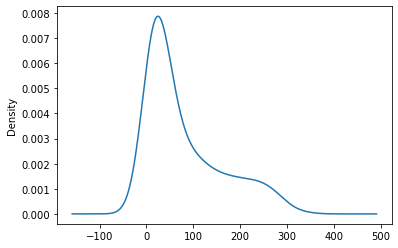

In [17]:
t_h.plot.density()

In [ ]:
# the majority of the training hours in this bin are less than 100 hours. Thr higher amounts of training hours like 200 are 
# seen less often

In [22]:
# Determine which values to replace if counts are less than ...?
replace_application= list(t_h[t_h > 200].index)

# Replace in dataframe
for hours in replace_application:
    df_HR.training_hours = df_HR.training_hours.replace(hours,"More")
    
# Check to make sure binning was successful
df_HR.training_hours.value_counts()

More    7208
25       199
43       199
52       196
40       192
        ... 
266        6
234        5
272        5
286        5
238        4
Name: training_hours, Length: 213, dtype: int64

In [23]:
# Determine which values to replace if counts are less than ...?
replace_application= list(t_h[t_h < 100].index)

# Replace in dataframe
for hours in replace_application:
    df_HR.training_hours = df_HR.training_hours.replace(hours,"Less")
    
# Check to make sure binning was successful
df_HR.training_hours.value_counts()

More    7208
Less    5824
25       199
43       199
52       196
40       192
16       192
30       187
31       184
29       179
39       178
51       176
45       175
55       171
78       165
19       163
37       163
35       162
54       161
47       157
72       153
33       150
41       145
80       144
57       142
102      137
53       136
70       132
64       132
74       131
58       131
62       128
94       124
96       123
3        119
90       118
27       116
38       115
100      113
68       113
84       111
5        107
66       107
Name: training_hours, dtype: int64

In [24]:
# Determine which values to replace if counts are less than ...?
replace_application= list(t_h[(t_h > 100) & (t_h < 200)].index)

# Replace in dataframe
for hours in replace_application:
    df_HR.training_hours = df_HR.training_hours.replace(hours,"Between")
    
# Check to make sure binning was successful
df_HR.training_hours.value_counts()

More       7208
Between    6126
Less       5824
Name: training_hours, dtype: int64

In [25]:
df_HR

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50through99,NaN,1,More,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50through99,Pvt Ltd,>4,Between,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,50through99,NaN,never,Less,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,50through99,Pvt Ltd,never,Between,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50through99,Funded Startup,4,More,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,50through99,NaN,1,More,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50through99,NaN,4,Between,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50through99,Pvt Ltd,4,More,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500through999,Pvt Ltd,2,Less,0.0


# last_new_job

In [26]:
last_job = df_HR["last_new_job"].value_counts()
last_job

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [27]:
df_HR[(df_HR["last_new_job"].notnull()) & (df_HR["last_new_job"]!=u"")].index
#423 null values and 390 of them are empty strings

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            19148, 19149, 19150, 19151, 19152, 19153, 19154, 19155, 19156,
            19157],
           dtype='int64', length=18735)

In [28]:
# df_HR.loc[(df_HR["last_new_job"]== " ")] = np.nan
# df_HR

In [29]:
# df_HR["last_new_job"].replace("","NaN", inplace=True)
# df_HR

In [30]:
df_HR["last_new_job"].fillna(1)
df_HR["last_new_job"].isnull().sum()

423

In [31]:
empty_value =float("NaN")
df_HR.replace("",empty_value, inplace=True)
df_HR.dropna(subset=["last_new_job"], inplace= True)

In [32]:
df_HR["last_new_job"].isnull().sum()

0

In [33]:
df_HR["last_new_job"]= df_HR["last_new_job"].str.replace("never", "0", regex=True)
df_HR["last_new_job"]

0         1
1        >4
2         0
3         0
4         4
         ..
19153     1
19154     4
19155     4
19156     2
19157     1
Name: last_new_job, Length: 18735, dtype: object

In [34]:
df_HR["last_new_job"] = df_HR["last_new_job"].replace(">4", "5")
df_HR

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50through99,NaN,1,More,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50through99,Pvt Ltd,5,Between,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,50through99,NaN,0,Less,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,50through99,Pvt Ltd,0,Between,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50through99,Funded Startup,4,More,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,50through99,NaN,1,More,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50through99,NaN,4,Between,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50through99,Pvt Ltd,4,More,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500through999,Pvt Ltd,2,Less,0.0


In [35]:
df_HR.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4159
relevent_experience          0
enrolled_university        353
education_level            423
major_discipline          2698
experience                  41
company_size                 0
company_type              5899
last_new_job                 0
training_hours               0
target                       0
dtype: int64

# company_type

In [36]:
c_t = df_HR["company_type"].value_counts()
c_t

Pvt Ltd                9696
Funded Startup          991
Public Sector           936
Early Stage Startup     585
NGO                     512
Other                   116
Name: company_type, dtype: int64

In [37]:
df_HR["company_type"] = df_HR["company_type"].fillna("Pvt Ltd")
df_HR["company_type"].isnull().sum()

0

In [38]:
df_HR

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50through99,Pvt Ltd,1,More,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50through99,Pvt Ltd,5,Between,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,50through99,Pvt Ltd,0,Less,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,50through99,Pvt Ltd,0,Between,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50through99,Funded Startup,4,More,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,50through99,Pvt Ltd,1,More,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50through99,Pvt Ltd,4,Between,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50through99,Pvt Ltd,4,More,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500through999,Pvt Ltd,2,Less,0.0


# experience

In [3]:
exp = df_HR["experience"].value_counts()
exp

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [4]:
# #Iteration
# for i in gator:
df_HR["experience"]= df_HR["experience"].replace("<1", "0")
df_HR

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0,500-999,Pvt Ltd,2,97,0.0


In [5]:
df_HR["experience"]= df_HR["experience"].replace(">20", "21")


In [6]:
df_HR["experience"]= df_HR["experience"].fillna(20)
df_HR.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                   0
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [8]:
ex= df_HR["experience"].nunique()

22

<AxesSubplot:ylabel='Density'>

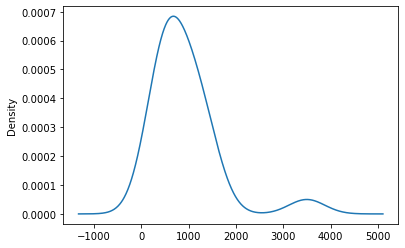

In [10]:
#exp.plot.density()

In [8]:
#df_HR["experience"]= pd.to_numeric(df_HR["experience"], downcast="float")

In [ ]:
df_HR["experience"]= pd.to_numeric(df_HR["experience"])

In [9]:
df_HR["experience"].dtypes

dtype('float32')

In [10]:
#exp.describe()

count      22.000000
mean      870.818182
std       694.101793
min        65.000000
25%       497.500000
50%       675.000000
75%      1102.250000
max      3434.000000
Name: experience, dtype: float64

In [11]:
# exp_bin= [0,300,670,1130,3499]

In [12]:
# exp_bin= [0,300,670,1130,3499]
# pd.cut(exp,exp_bin)

20    (1130, 3499]
5     (1130, 3499]
4     (1130, 3499]
3     (1130, 3499]
6     (1130, 3499]
2      (670, 1130]
7      (670, 1130]
10     (670, 1130]
9      (670, 1130]
8      (670, 1130]
15     (670, 1130]
11      (300, 670]
14      (300, 670]
1       (300, 670]
0       (300, 670]
16      (300, 670]
12      (300, 670]
13      (300, 670]
17      (300, 670]
19      (300, 670]
18        (0, 300]
20        (0, 300]
Name: experience, dtype: category
Categories (4, interval[int64, right]): [(0, 300] < (300, 670] < (670, 1130] < (1130, 3499]]

In [13]:
# exp_bin= [0,300,670,1130,3499]
# df_HR["experience"]= exp.groupby(pd.cut(exp, exp_bin)).count()

In [14]:
#df_HR

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,NaN,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,2.0,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,2.0,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,2.0,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,2.0,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,NaN,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,NaN,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,NaN,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,NaN,500-999,Pvt Ltd,2,97,0.0


# major_discipline

In [45]:
m_d= df_HR["major_discipline"].value_counts()
m_d

STEM               14211
Humanities           663
Other                371
Business Degree      325
Arts                 251
No Major             216
Name: major_discipline, dtype: int64

In [46]:
df_HR['major_discipline'] = df_HR['major_discipline'].fillna("STEM")
df_HR.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4159
relevent_experience          0
enrolled_university        353
education_level            423
major_discipline             0
experience                   0
company_size                 0
company_type                 0
last_new_job                 0
training_hours               0
target                       0
dtype: int64

# education_level

In [47]:
e_l= df_HR["education_level"].value_counts()
e_l

Graduate          11368
Masters            4285
High School        1953
Phd                 407
Primary School      299
Name: education_level, dtype: int64

In [48]:
df_HR['education_level'] = df_HR['education_level'].fillna("Graduate")
df_HR

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,50through99,Pvt Ltd,1,More,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50through99,Pvt Ltd,5,Between,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,50through99,Pvt Ltd,0,Less,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0,50through99,Pvt Ltd,0,Between,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,50through99,Funded Startup,4,More,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,50through99,Pvt Ltd,1,More,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50through99,Pvt Ltd,4,Between,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,50through99,Pvt Ltd,4,More,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,0,500through999,Pvt Ltd,2,Less,0.0


In [49]:
df_HR.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4159
relevent_experience          0
enrolled_university        353
education_level              0
major_discipline             0
experience                   0
company_size                 0
company_type                 0
last_new_job                 0
training_hours               0
target                       0
dtype: int64

# enrolled_university

In [50]:
#if time create one that fill in Nan 386 of them and more than half of those arent looking for jobs and are stem.
#would be better than dropping

In [51]:
e_u= df_HR["enrolled_university"].value_counts()
e_u

no_enrollment       13624
Full time course     3591
Part time course     1167
Name: enrolled_university, dtype: int64

In [52]:
df_HR = df_HR.dropna(subset=["enrolled_university"])
df_HR

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,50through99,Pvt Ltd,1,More,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50through99,Pvt Ltd,5,Between,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,50through99,Pvt Ltd,0,Less,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,50through99,Funded Startup,4,More,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,50through99,Pvt Ltd,1,More,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,50through99,Pvt Ltd,1,More,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50through99,Pvt Ltd,4,Between,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,50through99,Pvt Ltd,4,More,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,0,500through999,Pvt Ltd,2,Less,0.0


In [53]:
df_HR["enrolled_university"].isna().sum()

0

In [54]:
df_HR.drop("enrolled_university", axis=1, inplace=False)

,enrollee_id,city,city_development_index,gender,relevent_experience,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,Graduate,STEM,20,50through99,Pvt Ltd,1,More,1.0
1,29725,city_40,0.776,Male,No relevent experience,Graduate,STEM,15,50through99,Pvt Ltd,5,Between,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Graduate,STEM,5,50through99,Pvt Ltd,0,Less,0.0
4,666,city_162,0.767,Male,Has relevent experience,Masters,STEM,20,50through99,Funded Startup,4,More,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Graduate,STEM,11,50through99,Pvt Ltd,1,More,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,Graduate,Humanities,14,50through99,Pvt Ltd,1,More,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,Graduate,STEM,14,50through99,Pvt Ltd,4,Between,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,Graduate,STEM,20,50through99,Pvt Ltd,4,More,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,High School,STEM,0,500through999,Pvt Ltd,2,Less,0.0


# gender

In [55]:
gender= df_HR["gender"].value_counts()
gender

Male      12979
Female     1213
Other       178
Name: gender, dtype: int64

In [56]:
df_HR['gender'] = df_HR['gender'].fillna("Other")
df_HR

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,50through99,Pvt Ltd,1,More,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50through99,Pvt Ltd,5,Between,0.0
2,11561,city_21,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,50through99,Pvt Ltd,0,Less,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,50through99,Funded Startup,4,More,0.0
5,21651,city_176,0.764,Other,Has relevent experience,Part time course,Graduate,STEM,11,50through99,Pvt Ltd,1,More,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,50through99,Pvt Ltd,1,More,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50through99,Pvt Ltd,4,Between,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,50through99,Pvt Ltd,4,More,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,0,500through999,Pvt Ltd,2,Less,0.0


In [57]:
df_HR.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [59]:
#df_HR.to_csv("hr.csv")